In [166]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt

In [167]:
df = pd.read_excel('REGRESSAO_SIMPLES_Housing.xlsx')

In [168]:
df.head()

,MEDIA_QUARTOS,TX_OCUPACAO
0,6.575,24.0
1,6.421,21.6
2,7.185,34.7
3,6.998,33.4
4,7.147,36.2


In [169]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MEDIA_QUARTOS  506 non-null    float64
 1   TX_OCUPACAO    506 non-null    float64
dtypes: float64(2)
memory usage: 8.0 KB


In [170]:
X = df[['MEDIA_QUARTOS']]
y = df['TX_OCUPACAO']

In [171]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [172]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 354 entries, 5 to 102
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MEDIA_QUARTOS  354 non-null    float64
dtypes: float64(1)
memory usage: 5.5 KB


In [173]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 152 entries, 173 to 447
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MEDIA_QUARTOS  152 non-null    float64
dtypes: float64(1)
memory usage: 2.4 KB


In [174]:
y_test.info()

<class 'pandas.core.series.Series'>
Index: 152 entries, 173 to 447
Series name: TX_OCUPACAO
Non-Null Count  Dtype  
--------------  -----  
152 non-null    float64
dtypes: float64(1)
memory usage: 2.4 KB


In [175]:
y_train.info()

<class 'pandas.core.series.Series'>
Index: 354 entries, 5 to 102
Series name: TX_OCUPACAO
Non-Null Count  Dtype  
--------------  -----  
354 non-null    float64
dtypes: float64(1)
memory usage: 5.5 KB


In [176]:
from scipy.stats import pearsonr
corr, pval = pearsonr(X_train['MEDIA_QUARTOS'], y_train)

print('Correlação de Pearson:', corr)
print('P-valor:', pval)

Correlação de Pearson: 0.6984907195715625
P-valor: 4.275245516661134e-53


In [177]:
import statsmodels.api as sm
# Criação do modelo de regressão linear
modelo = sm.OLS(y_train, sm.add_constant(X_train)).fit()
# Resumo do modelo
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:            TX_OCUPACAO   R-squared:                       0.488
Model:                            OLS   Adj. R-squared:                  0.486
Method:                 Least Squares   F-statistic:                     335.4
Date:                Wed, 12 Apr 2023   Prob (F-statistic):           4.28e-53
Time:                        17:03:14   Log-Likelihood:                -1176.1
No. Observations:                 354   AIC:                             2356.
Df Residuals:                     352   BIC:                             2364.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           -34.6623      3.170    -10.935

In [178]:
# Previsão da taxa de ocupação
previsao_treino = modelo.predict(sm.add_constant(X_train))
previsao_real_treino = np.column_stack((previsao_treino, y_train))
previsao_real_treino = pd.DataFrame(previsao_real_treino, columns=['Previsto', 'Real'])

# Exibição das previsões
print('Previsão de treino:')
print(previsao_real_treino.head())

Previsão de treino:
    Previsto  Real
0  23.967090  28.7
1  21.651092  21.2
2  17.146749  19.3
3  19.453629  23.1
4  19.371566  19.1


In [179]:
# Cálculo do MSE e RMSE
mse_treino = np.mean((previsao_real_treino['Previsto'] - previsao_real_treino['Real'])**2)
rmse_treino = np.sqrt(mse_treino)

print('MSE de treino:', mse_treino)
print('RMSE de treino:', rmse_treino)

MSE de treino: 45.01275449524406
RMSE de treino: 6.709154529092623


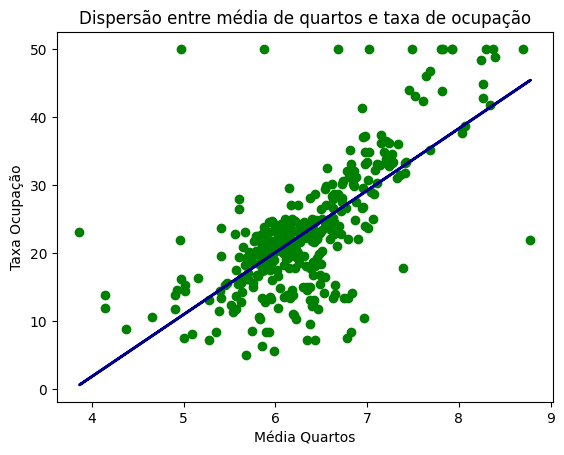

In [180]:
# Gráfico de dispersão
plt.scatter(X_train, y_train, color='green', marker='o', label='Dados')

# Adiciona título e rótulos nos eixos
plt.title('Dispersão entre média de quartos e taxa de ocupação')
plt.xlabel('Média Quartos')
plt.ylabel('Taxa Ocupação')

# Adiciona a linha de regressão
modelo = sm.OLS(y_train, sm.add_constant(X_train)).fit()
coeficientes = modelo.params
plt.plot(X_train, coeficientes[0] + coeficientes[1]*X_train, color='darkblue', linewidth=2)

# Mostra o gráfico
plt.show()

#### Previsao conjunto TESTE

In [191]:
# Criação do modelo de regressão linear
modelo2 = sm.OLS(y_test, sm.add_constant(X_test)).fit()
# Resumo do modelo
print(modelo2.summary())

                            OLS Regression Results                            
Dep. Variable:            TX_OCUPACAO   R-squared:                       0.460
Model:                            OLS   Adj. R-squared:                  0.457
Method:                 Least Squares   F-statistic:                     128.0
Date:                Wed, 12 Apr 2023   Prob (F-statistic):           7.71e-22
Time:                        17:36:46   Log-Likelihood:                -496.43
No. Observations:                 152   AIC:                             996.9
Df Residuals:                     150   BIC:                             1003.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           -34.1401      4.938     -6.914

In [192]:
# Previsão da taxa de ocupação
previsao_test = modelo2.predict(sm.add_constant(X_test))
previsao_real_test = np.column_stack((previsao_test, y_test))
previsao_real_test = pd.DataFrame(previsao_real_test, columns=['Previsto', 'Real'])

# Exibição das previsões
print('Previsão de test:')
print(previsao_real_test.head())

Previsão de test:
    Previsto  Real
0  23.444731  23.6
1  26.514246  32.4
2  19.558474  13.6
3  20.294440  22.8
4  22.376684  16.1


In [193]:
# Cálculo do MSE e RMSE
mse_test = np.mean((previsao_real_test['Previsto'] - previsao_real_test['Real'])**2)
rmse_test = np.sqrt(mse_test)

print('MSE de test:', mse_test)
print('RMSE de test:', rmse_test)

MSE de test: 40.21151144817721
RMSE de test: 6.341254721912471
